In [1]:
import sys

from data_helper import ImageGenerator, get_train_matrices, get_test_matrices
from sklearn.cross_validation import train_test_split
from keras_helper import KerasModel
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.
//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
img_size = (64, 64)
img_channels = 3
output_size = 17

In [3]:
x_train, y_train = get_train_matrices("../../planet-amazon-deforestation/input/train_v2.csv", "../../planet-amazon-deforestation/input/train-jpg", img_size)
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

100%|██████████| 40479/40479 [01:27<00:00, 463.73it/s]


In [4]:
generator = ImageGenerator()
flow = generator.get_train_generator(X_train, y_train)
validation_data = (X_valid, y_valid)

In [5]:
from tensorflow.contrib.keras.api.keras.callbacks import ModelCheckpoint

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)

In [6]:
model = KerasModel(img_size)
learn_rates = [0.001]
epochs_list = [1]
train_losses, val_losses = [], []

for lr, epochs in zip(learn_rates, epochs_list):
    tmp_train_losses, tmp_val_losses, fbeta_score = model.fit(flow, epochs, lr, (X_valid, y_valid), train_callbacks=[checkpoint])
    train_losses += tmp_train_losses
    val_losses += tmp_val_losses

Epoch 1/1
5/5 [==============================] - 75s - loss: 0.9373 - acc: 0.5394 - val_loss: 3.0098 - val_acc: 0.4093


In [7]:
model.load_weights("weights.best.hdf5")
print("Weights loaded")

Weights loaded


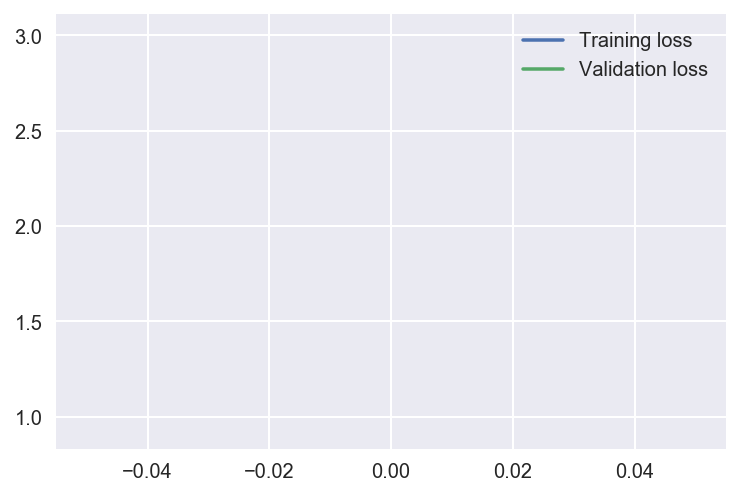

In [8]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend();

In [9]:
fbeta_score

0.20235427792010649

In [11]:
del x_train, y_train
gc.collect()

x_test, x_test_filename = get_test_matrices("/Users/westside/dev/python/planet-amazon-deforestation/input/test-jpg", img_size)
# Predict the labels of our x_test images
predictions = model.predict(x_test)

del x_test
gc.collect()

x_test, x_test_filename_additional = get_test_matrices("/Users/westside/dev/python/planet-amazon-deforestation/input/test-jpg-additional", img_size)
new_predictions = model.predict(x_test)

del x_test
gc.collect()
predictions = np.vstack((predictions, new_predictions))
x_test_filename = np.hstack((x_test_filename, x_test_filename_additional))
print("Predictions shape: {}\nFiles name shape: {}\n1st predictions entry:\n{}".format(predictions.shape, 
                                                                              x_test_filename.shape,
                                                                              predictions[0]))

NameError: name 'np' is not defined